### QUESTION 1: ANN
- Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
- Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data
- Requirement:
  + Apply ANN to build a model that predicts house prices from the provided features.
  + Make new predictions for samples that have no prices in the dataset.

# 0. Mount drvie & import packages

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question1_ANN'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question1_ANN


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# 1. Load and Prepare data

In [4]:
df = pd.read_csv('Dataset/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [6]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [7]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],inplace=True)
df.reset_index(inplace=True, drop=True)

In [8]:
# convert 'Date' to datetime
df.Date = pd.to_datetime(df.Date,format='%d/%m/%Y')

In [9]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63019 entries, 0 to 63018
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63019 non-null  object        
 1   Address        63019 non-null  object        
 2   Rooms          63019 non-null  int64         
 3   Type           63019 non-null  object        
 4   Price          48431 non-null  float64       
 5   Method         63019 non-null  object        
 6   SellerG        63019 non-null  object        
 7   Date           63019 non-null  datetime64[ns]
 8   Postcode       63019 non-null  int64         
 9   Regionname     63019 non-null  object        
 10  Propertycount  63019 non-null  int64         
 11  Distance       63019 non-null  float64       
 12  CouncilArea    63019 non-null  object        
 13  Year           63019 non-null  int64         
 14  Month          63019 non-null  int64         
 15  Day            6301

In [11]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year,Month,Day
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017,4,1
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017,4,1


In [12]:
df[['Suburb', 'Postcode']][:10]

,Suburb,Postcode
0,Abbotsford,3067
1,Abbotsford,3067
2,Abbotsford,3067
3,Aberfeldie,3040
4,Airport West,3042
5,Airport West,3042
6,Airport West,3042
7,Airport West,3042
8,Albanvale,3021
9,Albert Park,3206


## Nhận xét:
- 'Address' có các giá trị là unique => loại feature này
- 'Suburb', 'Regionname', 'Postcode','CouncilArea' => đều là các feature chỉ vị trí của nhà. Trong đó:   
  + 'Suburb' (~ Quận) thể hiện vị trí ngôi nhà cụ thể hơn 'Regionname' (Vùng) hay CouncilArea (~ City)
  + 'Suburb' và 'Postcode' khá tương đồng nhau, để xác định vị trí của ngôi nhà thì 'Suburb' sẽ hợp lý hơn 
  + => cân nhắc loại  các feature: 'Regionname', 'Postcode','CouncilArea'
- Các feature 'SellerG', 'Date','Propertycount' theo domain knowledge cũng sẽ không ảnh hưởng đến giá nhà => có thể cân nhắc loại bỏ các feature này
- Ta sẽ build model trên 2 tập dữ liệu : tập dữ liệu Gốc và tập dữ liệu đã loại bỏ bớt feature như đã nhận định ở

In [13]:
# Tập dữ liệu đã loại bỏ bớt feature
df2 = df[['Suburb','Rooms','Type','Price','Method','Distance']]

In [14]:
# Preprocess tren du lieu Goc bo 'Address' vi cac gia tri la unique
df = df.drop(['Address','Date'],axis=1)

In [15]:
df = pd.get_dummies(df,drop_first=True)

In [16]:
#Tach thanh 2 tap du lieu df_new de train, va df_new de predict
df_new = df[df.Price.isnull() == False].reset_index(drop=True)
df_null = df[df.Price.isnull()].reset_index(drop=True)
df_new.shape, df_null.shape

((48431, 912), (14588, 912))

In [17]:
#Split into input/ output
X = df_new.drop(['Price'], axis=1)
y = df_new['Price']
y = np.reshape(np.array(y), (-1,1))
X.shape, y.shape

((48431, 911), (48431, 1))

In [18]:
# cat_feature = ['Suburb', 'Type', 'Method', 'Postcode', 'Regionname', 'CouncilArea','Year','Month','Day']
# num_feature = ['Rooms']
# cat_transform = OneHotEncoder(handle_unknown='ignore',drop='first')
# preprocessing = ColumnTransformer(transformers=[
#                                                ('cat',cat_transform,cat_feature),
#                                                ('num',num_feature,MinMaxScaler())
# ])

# 2. Build ANN network voi du lieu Goc

### 2.1 Model 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [40]:
# Create Keras model
model = keras.Sequential()
# the hidden layers
model.add(layers.Dense(units=456, input_shape=[911], activation='relu'))
model.add(layers.Dense(units=456, activation='relu'))
# the output layers
model.add(layers.Dense(units=1))

In [41]:
# Compile
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse','mae'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 456)               415872    
                                                                 
 dense_1 (Dense)             (None, 456)               208392    
                                                                 
 dense_2 (Dense)             (None, 1)                 457       
                                                                 
Total params: 624,721
Trainable params: 624,721
Non-trainable params: 0
_________________________________________________________________


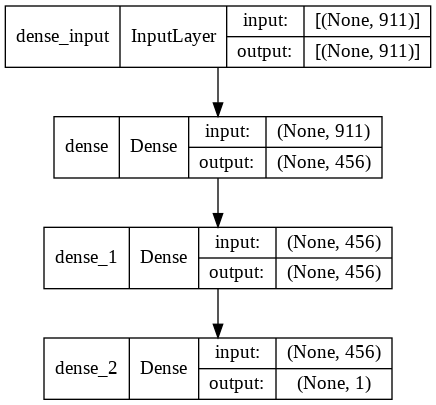

In [54]:
plot_model(model, to_file='ANN_houseprice_model1.png', show_shapes=True)
Image(filename='ANN_houseprice_model1.png')

In [41]:
# Early Stopping
early_stopping = EarlyStopping(
    min_delta=0.001,    #min amount of change to count as an improvement
    patience=20,       #how many epochs to wait before stopping
    restore_best_weights=True)

In [45]:
# Fit model w EarlyStopping
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, #default=32
                    epochs=200,
                    callbacks=[early_stopping], 
                    verbose=1)

Epoch 1/200
1060/1060 [==============================] - 3s 3ms/step - loss: 267615944704.0000 - mse: 267615944704.0000 - mae: 341663.7188 - val_loss: 236189777920.0000 - val_mse: 236189777920.0000 - val_mae: 316562.0312
Epoch 2/200
1060/1060 [==============================] - 3s 3ms/step - loss: 236922159104.0000 - mse: 236922159104.0000 - mae: 316998.2500 - val_loss: 209503453184.0000 - val_mse: 209503453184.0000 - val_mae: 293191.0938
Epoch 3/200
1060/1060 [==============================] - 3s 3ms/step - loss: 206780989440.0000 - mse: 206780989440.0000 - mae: 292609.0000 - val_loss: 177946312704.0000 - val_mse: 177946312704.0000 - val_mae: 271105.5938
Epoch 4/200
1060/1060 [==============================] - 3s 3ms/step - loss: 182678536192.0000 - mse: 182678536192.0000 - mae: 272103.5312 - val_loss: 160690814976.0000 - val_mse: 160690814976.0000 - val_mae: 252969.8125
Epoch 5/200
1060/1060 [==============================] - 3s 3ms/step - loss: 165913165824.0000 - mse: 165913165824.0

In [46]:
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
43,1.120409e+11,1.120409e+11,202551.093750,1.417502e+11,1.417502e+11,219283.500000
44,1.124475e+11,1.124475e+11,203906.765625,1.253857e+11,1.253857e+11,239288.250000
45,1.117361e+11,1.117361e+11,201435.203125,1.398917e+11,1.398917e+11,254008.031250
46,1.109382e+11,1.109382e+11,202124.093750,1.299335e+11,1.299335e+11,211692.359375
47,1.113784e+11,1.113784e+11,203202.046875,1.137081e+11,1.137081e+11,198061.062500


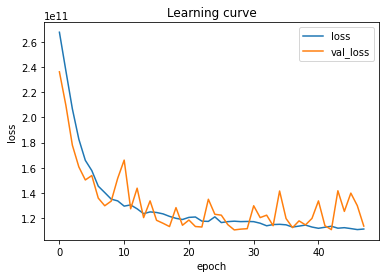

Minumum validation loss: 110674042880.0


In [47]:
import matplotlib.pyplot as plt

history_df.loc[:,['loss','val_loss']].plot()
plt.title('Learning curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Minumum validation loss: {}'.format(history_df['val_loss'].min()))

In [48]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6776667981679012

### 2.2 Model 2

In [49]:
model_1 = keras.Sequential([
          layers.Dense(456, activation='relu', input_shape=[911]),
          layers.Dropout(0.3),   #apply 30%
          layers.BatchNormalization(),
          layers.Dense(456, activation='relu'),
          layers.Dropout(0.3),    #apply 30%
          layers.BatchNormalization(),
          layers.Dense(1) ])

In [50]:
# Compile
model_1.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse','mae'])

In [51]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 456)               415872    
                                                                 
 dropout (Dropout)           (None, 456)               0         
                                                                 
 batch_normalization (BatchN  (None, 456)              1824      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 456)               208392    
                                                                 
 dropout_1 (Dropout)         (None, 456)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 456)              1824      
 hNormalization)                                      

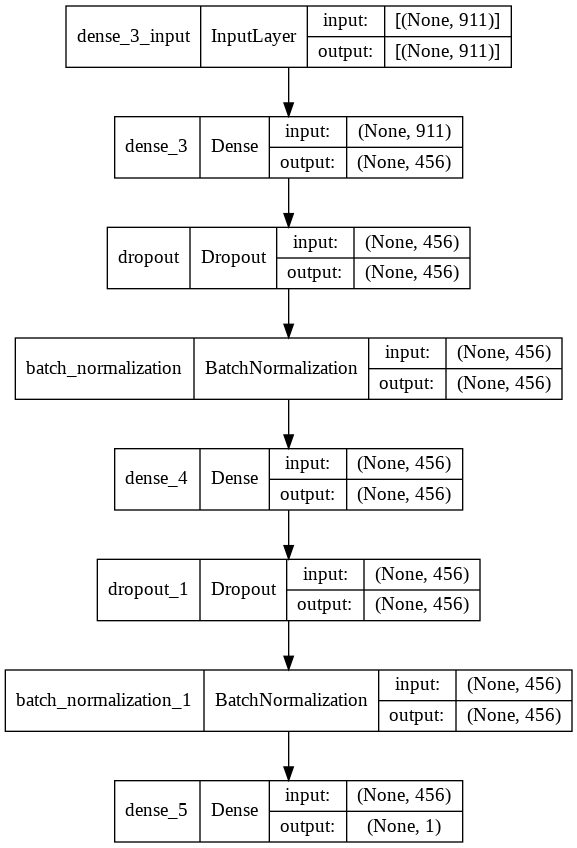

In [55]:
plot_model(model_1, to_file='ANN_houseprice_model2.png', show_shapes=True)
Image(filename='ANN_houseprice_model2.png')

In [52]:
# Fit model w EarlyStopping
history = model_1.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, #default=32
                    epochs=200,
                    callbacks=[early_stopping], 
                    verbose=0)

In [53]:
history_df1 = pd.DataFrame(history.history)
history_df1.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
66,3.561912e+11,3.561912e+11,415852.21875,3.433670e+11,3.433670e+11,413671.65625
67,3.561584e+11,3.561584e+11,415901.34375,3.433543e+11,3.433543e+11,414346.46875
68,3.561152e+11,3.561152e+11,415842.21875,3.433621e+11,3.433621e+11,413869.75000
69,3.561834e+11,3.561834e+11,416061.21875,3.433635e+11,3.433635e+11,413801.96875
70,3.561866e+11,3.561866e+11,416136.90625,3.433675e+11,3.433675e+11,413645.96875


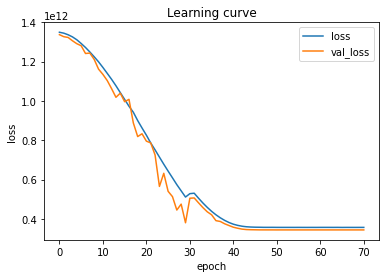

Minumum validation loss: 343353196544.0


In [56]:
history_df1.loc[:,['loss','val_loss']].plot()
plt.title('Learning curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Minumum validation loss: {}'.format(history_df1['val_loss'].min()))

In [57]:
y_pred_1 = model_1.predict(X_test)
r2_score(y_test, y_pred_1)

-5.626646044643024e-07

### 2.3 Model 3 - voi Tuned Parameters

In [ ]:
def build_regressor(optimizer):
  model = keras.Sequential([
                layers.Dense(456, activation='relu', input_shape=[911]),
                layers.Dense(456, activation='relu'),
                layers.Dense(1),
])
  model.compile(optimizer='adam', loss='mae', metrics=['mse','mae'])
  return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor)
#định nghĩa tham số trong GridSearchCV
parameters = {'batch_size':[32,64,128],
              'epochs':[100,150,200],
              'optimizer':['adam','rmsprop','sgd']
              }
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           #scoring = 'neg_mean_squared_error',
                           cv=5)
grid_search = grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
212/212 [==============================] - 1s 5ms/step - loss: 186694.3750 - mse: 107837612032.0000 - mae: 186694.3750
Epoch 108/200
212/212 [==============================] - 1s 5ms/step - loss: 185272.3594 - mse: 106893090816.0000 - mae: 185272.3594
Epoch 109/200
212/212 [==============================] - 1s 5ms/step - loss: 185533.8750 - mse: 107174338560.0000 - mae: 185533.8750
Epoch 110/200
212/212 [==============================] - 1s 5ms/step - loss: 184412.3281 - mse: 105862127616.0000 - mae: 184412.3281
Epoch 111/200
212/212 [==============================] - 1s 5ms/step - loss: 185753.7969 - mse: 107420614656.0000 - mae: 185753.7969
Epoch 112/200
212/212 [==============================] - 1s 5ms/step - loss: 182983.3125 - mse: 105380700160.0000 - mae: 182983.3125
Epoch 113/200
212/212 [==============================] - 1s 5ms/step - loss: 183816.0469 - mse: 105706938368.0000 - mae: 183816.0469
Epoch 114/200
212/212 [=========

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("best_parameters:", best_parameters)
print("best_score:", best_score)

best_parameters: {'batch_size': 64, 'epochs': 200, 'optimizer': 'rmsprop'}
best_score: -183204.2


In [ ]:
# # Predictions
# df_null.head()

In [ ]:
# X_now = df_null

In [ ]:
# Create Keras model
model_2 = keras.Sequential()
# the hidden layers
model_2.add(layers.Dense(units=456, input_shape=[911], activation='relu'))
model_2.add(layers.Dense(units=456, activation='relu'))
# the output layers
model_2.add(layers.Dense(units=1))

In [ ]:
# Compile
model_2.compile(optimizer='rmsprop', 
              loss='mse',
              metrics=['mse','mae'])

In [ ]:
# Fit model w EarlyStopping
history = model_2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), # or validation_split=0.2
                    batch_size=64, #default=32
                    epochs=200,
                    callbacks=[early_stopping], 
                    verbose=0) #turn off training log

In [ ]:
history_df2 = pd.DataFrame(history.history)
history_df2.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
88,1.273013e+11,1.273013e+11,216852.093750,1.114724e+11,1.114724e+11,198625.765625
89,1.272663e+11,1.272663e+11,215571.734375,1.201411e+11,1.201411e+11,194404.281250
90,1.260736e+11,1.260736e+11,215896.937500,1.302419e+11,1.302419e+11,199505.562500
91,1.264879e+11,1.264879e+11,215268.125000,2.141961e+11,2.141961e+11,291198.656250
92,1.266116e+11,1.266116e+11,216948.890625,1.355761e+11,1.355761e+11,209291.953125


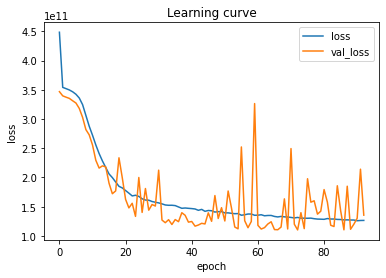

Minumum validation loss: 110358953984.0


In [ ]:
history_df2.loc[:,['loss','val_loss']].plot()
plt.title('Learning curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Minumum validation loss: {}'.format(history_df2['val_loss'].min()))

In [ ]:
y_pred_2 = model_2.predict(X_test)
r2_score(y_test, y_pred_2)

0.678584343957591

# 3. Build ANN network - voi selected feature (df2)

In [19]:
df2.head()

,Suburb,Rooms,Type,Price,Method,Distance
0,Abbotsford,3,h,1490000.0,S,3.0
1,Abbotsford,3,h,1220000.0,S,3.0
2,Abbotsford,3,h,1420000.0,S,3.0
3,Aberfeldie,3,h,1515000.0,S,7.5
4,Airport West,2,h,670000.0,S,10.4


In [20]:
df2 = pd.get_dummies(df2,drop_first=True)

In [21]:
#Tach thanh 2 tap du lieu df_new de train, va df_new de predict
df2_new = df2[df2.Price.isnull() == False].reset_index(drop=True)
df2_null = df2[df2.Price.isnull()].reset_index(drop=True)
df2_new.shape, df2_null.shape

((48431, 392), (14588, 392))

In [22]:
#Split into input/ output
X2 = df2_new.drop(['Price'], axis=1)
y2 = df2_new['Price']
y2 = np.reshape(np.array(y2), (-1,1))
X2.shape, y2.shape

((48431, 391), (48431, 1))

In [208]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=16, test_size=0.2)

In [209]:
# Create Keras model
model4 = keras.Sequential()
# the hidden layers
model4.add(layers.Dense(units=256, input_shape=[391], activation='relu'))
model4.add(layers.Dense(units=256, activation='relu'))
# the output layers
model4.add(layers.Dense(units=1))

In [210]:
# Compile
model4.compile(tf.keras.optimizers.RMSprop(learning_rate=0.01), 
              loss='mse',
              metrics=['mse','mae'])

In [211]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               100352    
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


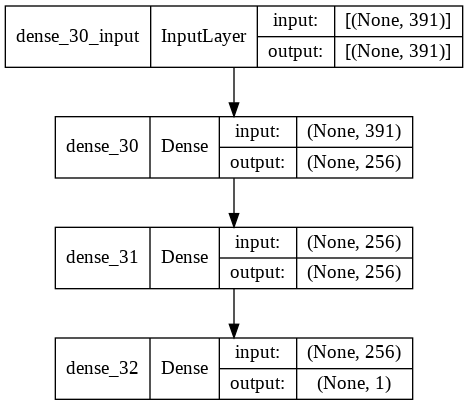

In [212]:
plot_model(model4, to_file='ANN_houseprice_model4.png', show_shapes=True)
Image(filename='ANN_houseprice_model4.png')

In [213]:
# Early Stopping
early_stopping = EarlyStopping(
    min_delta=0.001,    #min amount of change to count as an improvement
    patience=20,       #how many epochs to wait before stopping
    restore_best_weights=True)

In [214]:
# Fit model w EarlyStopping
history4 = model4.fit(X2_train, y2_train, 
                    validation_data=(X2_test, y2_test), 
                    batch_size=512, #default=32
                    epochs=200,
                    callbacks=[early_stopping], 
                    verbose=1)

Epoch 1/200
76/76 [==============================] - 1s 7ms/step - loss: 1033537257472.0000 - mse: 1033537257472.0000 - mae: 803996.5625 - val_loss: 622670774272.0000 - val_mse: 622670774272.0000 - val_mae: 534065.1875
Epoch 2/200
76/76 [==============================] - 0s 4ms/step - loss: 509418536960.0000 - mse: 509418536960.0000 - mae: 486670.3125 - val_loss: 405132476416.0000 - val_mse: 405132476416.0000 - val_mae: 428907.8438
Epoch 3/200
76/76 [==============================] - 0s 4ms/step - loss: 283136753664.0000 - mse: 283136753664.0000 - mae: 349374.9688 - val_loss: 207039725568.0000 - val_mse: 207039725568.0000 - val_mae: 294943.4688
Epoch 4/200
76/76 [==============================] - 0s 4ms/step - loss: 186043858944.0000 - mse: 186043858944.0000 - mae: 276093.0312 - val_loss: 165320949760.0000 - val_mse: 165320949760.0000 - val_mae: 254324.1250
Epoch 5/200
76/76 [==============================] - 0s 4ms/step - loss: 154669350912.0000 - mse: 154669350912.0000 - mae: 242743.

In [215]:
history4_df = pd.DataFrame(history4.history)
history4_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
139,9.450763e+10,9.450763e+10,175277.562500,9.358861e+10,9.358861e+10,178144.875000
140,9.434851e+10,9.434851e+10,175176.890625,9.483031e+10,9.483031e+10,184575.656250
141,9.402420e+10,9.402420e+10,175173.875000,9.469111e+10,9.469111e+10,184425.703125
142,9.402381e+10,9.402381e+10,174985.000000,9.395982e+10,9.395982e+10,178370.484375
143,9.412422e+10,9.412422e+10,175092.343750,9.366822e+10,9.366822e+10,180561.500000


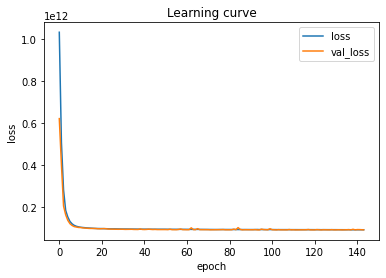

Minumum validation loss: 93282492416.0


In [216]:
history4_df.loc[:,['loss','val_loss']].plot()
plt.title('Learning curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Minumum validation loss: {}'.format(history4_df['val_loss'].min()))

In [217]:
import math
val_rmse = math.sqrt(history4_df['val_loss'].min())
val_rmse

305421.82701306726

In [218]:
y2_pred = model4.predict(X2_test)
r2_score(y2_test, y2_pred)

0.740438768516771

In [220]:
#Save model
model4.save('ANN_houseprice_model.h5')
print('Saved!!')

Saved!!


### Nhận xét:
- Trong 4 model  model 4 có accuracy score cao nhất và val_loss thấp nhất trong các model. Tuy nhiên:
  + Accuracy Score ~74%: không cao
  + rmse ~ 305421 bằng khoảng 30% giá trị trung bình của (sai số tương đối lớn) 
- => cần tìm phương pháp để tối ưu model hoặc

In [222]:
df2_null.head()

,Rooms,Price,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,...,Suburb_Warrandyte South,Suburb_Warranwood,Suburb_Waterways,Suburb_Watsonia,Suburb_Watsonia North,Suburb_Wattle Glen,Suburb_Werribee,Suburb_Werribee South,Suburb_West Footscray,Suburb_West Melbourne,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Wildwood,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Woori Yallock,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yan Yean,Suburb_Yarra Glen,Suburb_Yarra Junction,Suburb_Yarrambat,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,6,NaN,14.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,NaN,15.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4,NaN,10.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,NaN,16.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3,NaN,9.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [224]:
df2_null.to_csv('Dataset/MELBOURNE_HOUSE_PRICES_PREDICT.csv',index=False)